In [71]:
import pandas as pd
import numpy as np

In [72]:
csv_file = pd.read_csv("/Users/a90530/Downloads/akbank/dataset/rawData.csv")
df = pd.DataFrame(csv_file)

In [73]:
def veri_inceleme(df):
    print("\nDataframe'in ilk 5 tanesi")
    print(df.head())
    print("\n\nDataframe'in columnları")
    print(df.columns)
    print("\n\nDataframe hakkında istatistiksel bilgi")
    print(df.describe())
    print("\nColumn Sayısı:")
    print(df.shape)
    print("\n\nDataframe hakkındaki bilgileri verir")
    print(df.info())
    print("\n\nDataframe'deki boş girilen hücreleri gösterir")
    print(df.isnull().sum())
veri_inceleme(df)


Dataframe'in ilk 5 tanesi
   id                                              title       postingDate  \
0   1                                     Care Home Cook  07 November 2023   
1   2                                     Care Assistant  07 November 2023   
2   3                        Senior Sister Critical Care  07 November 2023   
3   4  Critical Care Clinical Skills and Learning Fac...  07 November 2023   
4   5                                     Health Visitor  07 November 2023   

                              salary      hours       closingDate  \
0                    £12.50 per hour  Part time  07 December 2023   
1          £10.80 to £11.00 per hour  Part time  07 December 2023   
2  £43,742.00 to £50,056.00 per year  Full time  21 November 2023   
3  £35,392.00 to £42,618.00 per year  Full time  21 November 2023   
4  £35,392.00 to £42,618.00 per year  Full time  21 November 2023   

              location               state  city              company  \
0          Dover

In [74]:
#Kullanılmayacak verilerin ve null değerlerin silinmesi işlemi
df = df.drop(columns=['additionalSalaryInf','jobReference'])
df = df.dropna()

Öğretim İşleri


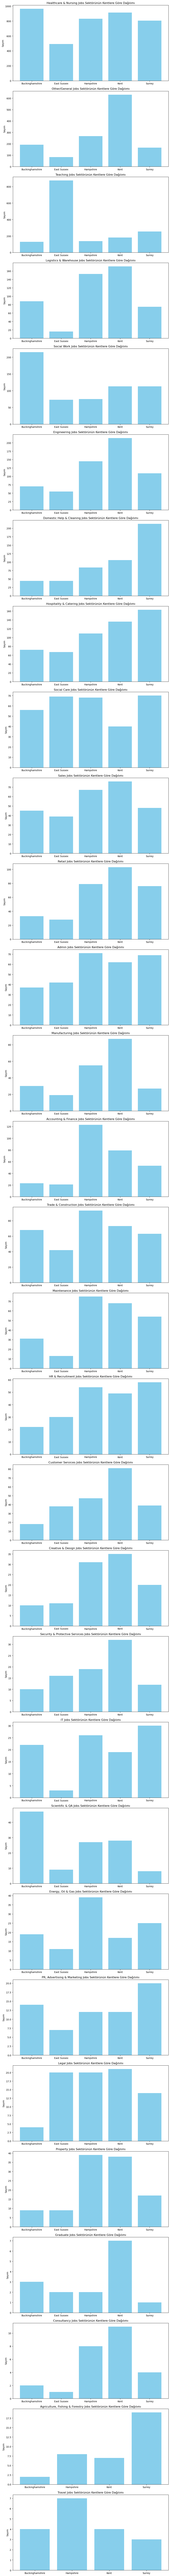

In [75]:
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/a90530/Downloads/akbank/modules')
from translator import CategoryTranslator

location_distribution = df.groupby(['category', 'city']).size().reset_index(name='count')

#Bütün özgün lokasyonların ve kategorilerin toplanması işlemi
categories = df['category'].unique()
category_translator = CategoryTranslator("/Users/a90530/Downloads/akbank/translations.json")
#df['translated_category'] = category_translator.translate_categories(df, 'category')['translated_category']

fig, axes = plt.subplots(len(categories), 1, figsize=(10, len(categories)*5))

# Her bir kategori için ayrı bir plot 
for i, category in enumerate(categories):
    category_data = location_distribution[location_distribution['category'] == category]
    ax = axes[i]
    ax.bar(category_data['city'], category_data['count'], color='skyblue')
    ax.set_title(f'{category} Sektörünün Kentlere Göre Dağılımı')
    ax.set_ylabel('Sayım')


plt.tight_layout()

plt.show()